## Import Libraries

In [57]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Data Loading

In [2]:
os.listdir("input")

['city_day.csv']

In [3]:
df=pd.read_csv("input/city_day.csv")

***Prelimanary Analysis***

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NH3,NOx,NO2,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.shape

(29531, 16)

## Data Preprocessing

***Nullvalues Analysis***

In [6]:
nan_features=[feature for feature in df.columns if df[feature].isnull().sum()>=1]

In [7]:
print(nan_features)

['PM2.5', 'PM10', 'NO', 'NH3', 'NOx', 'NO2', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [8]:
for feature in df.columns:
    print("{}: {} Missing values".format(feature,df[feature].isnull().sum()))

City: 0 Missing values
Date: 0 Missing values
PM2.5: 4598 Missing values
PM10: 11140 Missing values
NO: 3582 Missing values
NH3: 3585 Missing values
NOx: 4185 Missing values
NO2: 10328 Missing values
CO: 2059 Missing values
SO2: 3854 Missing values
O3: 4022 Missing values
Benzene: 5623 Missing values
Toluene: 8041 Missing values
Xylene: 18109 Missing values
AQI: 4681 Missing values
AQI_Bucket: 4681 Missing values


In [9]:
lessnan_features=[feature for feature in df.columns if df[feature].isnull().sum()<10000]

In [10]:
df=df[lessnan_features]

In [11]:
df.head()

,City,Date,PM2.5,NO,NH3,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,NaN,NaN


In [12]:
df=df.dropna().reset_index(drop=True)

In [13]:
df.head()

,City,Date,PM2.5,NO,NH3,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,29-01-2015,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,209.0,Poor
1,Ahmedabad,30-01-2015,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
2,Ahmedabad,31-01-2015,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,514.0,Severe
3,Ahmedabad,01-02-2015,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,782.0,Severe
4,Ahmedabad,02-02-2015,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,914.0,Severe


In [14]:
df.drop(labels=["City","Date"],axis=1,inplace=True)

In [15]:
df.shape

(16984, 11)

In [16]:
df.head()

,PM2.5,NO,NH3,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,209.0,Poor
1,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
2,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,514.0,Severe
3,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,782.0,Severe
4,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,914.0,Severe


In [54]:
class_labels=df["AQI_Bucket"].unique().tolist()
class_labels.sort()
print(class_labels)

['Good', 'Moderate', 'Poor', 'Satisfactory', 'Severe', 'Very Poor']


In [18]:
df["AQI_Bucket"].value_counts()

Moderate        5943
Satisfactory    5385
Poor            2006
Very Poor       1770
Severe          1087
Good             793
Name: AQI_Bucket, dtype: int64

***bar-chart***

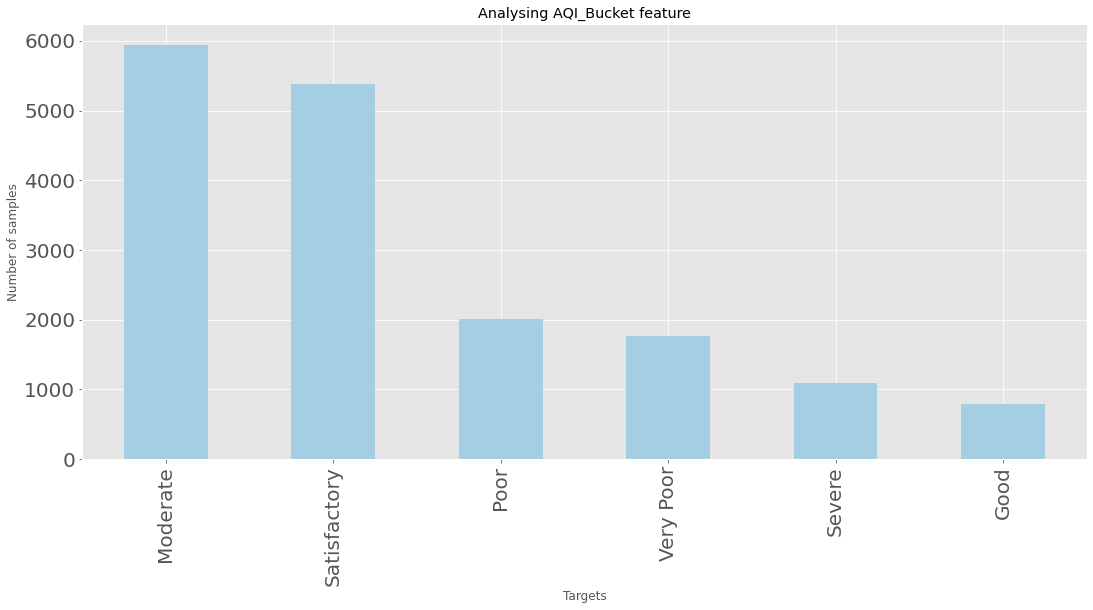

In [19]:
with plt.style.context(style='ggplot'):
    df["AQI_Bucket"].value_counts().plot.bar(fontsize=20,figsize=(18,8),colormap="Paired")
    plt.title(label='Analysing AQI_Bucket feature')
    plt.xlabel(xlabel='Targets')
    plt.ylabel(ylabel='Number of samples')
    plt.show()

***pie-chart***

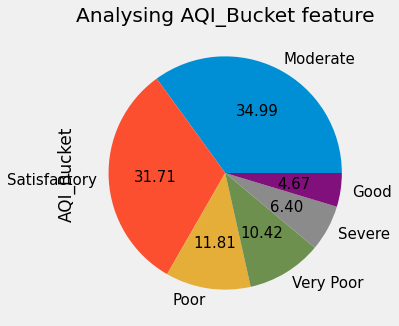

In [20]:
with plt.style.context(style='fivethirtyeight'):
    df["AQI_Bucket"].value_counts().plot.pie(fontsize=15,figsize=(5,5),autopct="%.2f")
    plt.title(label='Analysing AQI_Bucket feature')
    plt.show()

***Finding outliers using Boxplot***

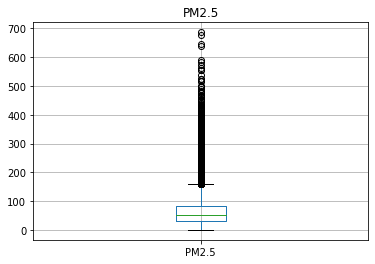

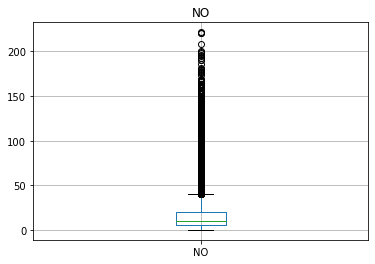

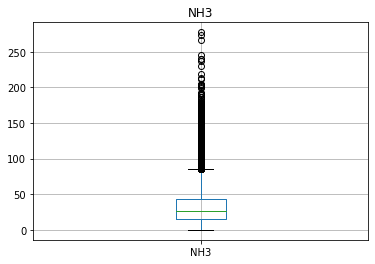

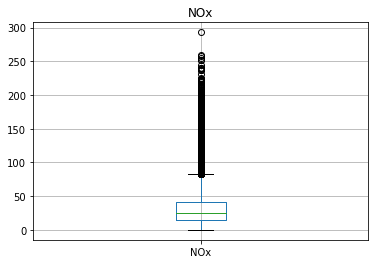

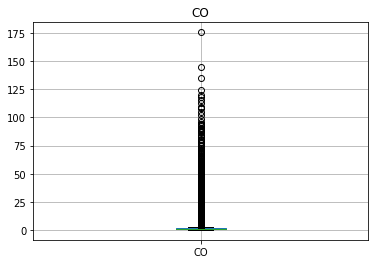

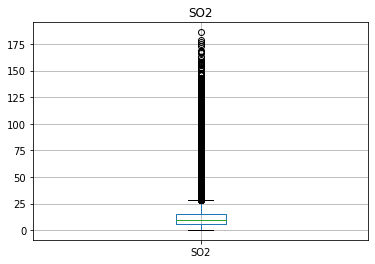

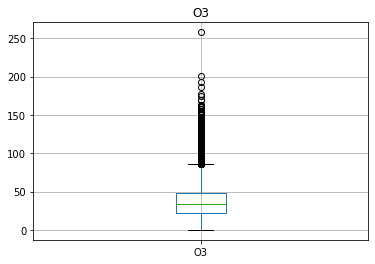

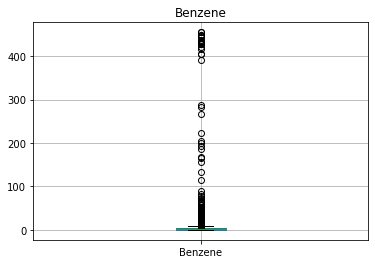

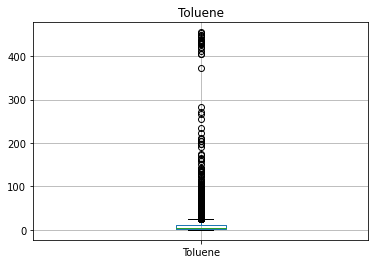

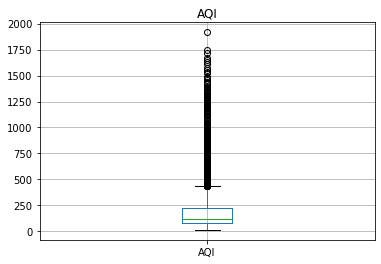

In [21]:
for feature in df.columns:
    data=df.copy()
    if feature!="AQI_Bucket":
        data.boxplot(feature)
        plt.title(feature)
        plt.show()

In [22]:
df.shape

(16984, 11)

***Droping outliers***

In [23]:
df = df[df['Benzene']< 300]
df = df[df['Toluene']< 300]

In [24]:
df.shape

(16961, 11)

***Data Oversampling***

In [25]:
df.head()

,PM2.5,NO,NH3,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,0.00,209.0,Poor
1,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
2,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,0.01,514.0,Severe
3,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,0.04,782.0,Severe
4,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,0.06,914.0,Severe


In [26]:
final_df=[]
for label in df['AQI_Bucket'].unique().tolist():
    label_df=df.loc[df['AQI_Bucket']==label]
    oversampled=resample(label_df,n_samples=max(df['AQI_Bucket'].value_counts()))
    final_df.append(oversampled)

In [27]:
df=pd.concat(final_df,ignore_index=True)
df=df.sample(frac=1).reset_index(drop=True)

In [28]:
df.shape

(35646, 11)

In [29]:
df.head()

,PM2.5,NO,NH3,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,94.47,33.58,23.43,57.00,1.05,6.81,19.85,0.20,0.86,210.0,Poor
1,52.95,13.86,54.40,39.49,1.08,12.38,33.49,6.25,35.39,130.0,Moderate
2,114.95,33.15,81.62,107.33,0.86,13.30,41.71,5.11,9.27,286.0,Poor
3,40.53,36.00,43.33,61.43,36.00,49.29,32.49,2.14,32.05,563.0,Severe
4,35.94,17.24,17.53,35.08,0.77,6.63,23.65,0.06,0.32,83.0,Satisfactory


In [30]:
df.AQI_Bucket.value_counts()

Poor            5941
Moderate        5941
Severe          5941
Satisfactory    5941
Very Poor       5941
Good            5941
Name: AQI_Bucket, dtype: int64

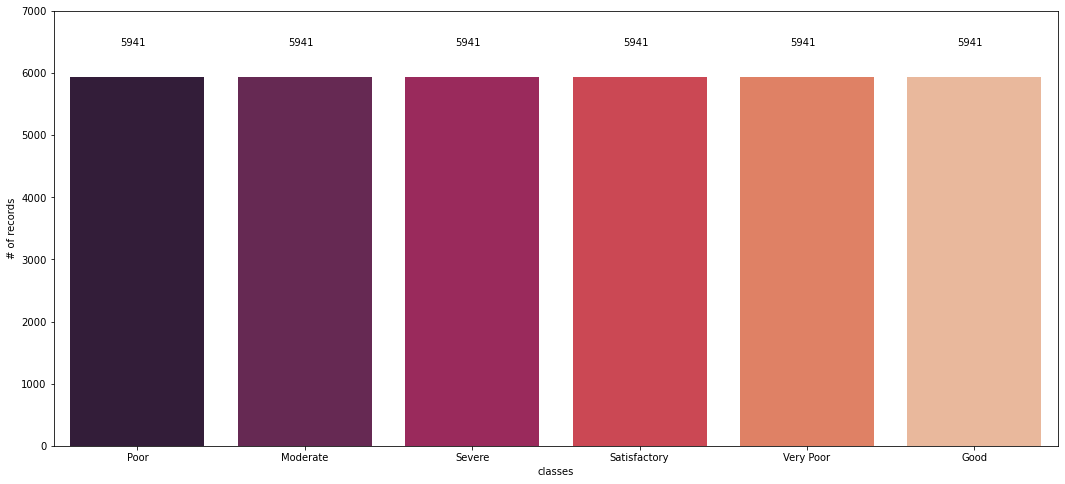

In [31]:
plt.figure(figsize=(18,8))
ax=sns.countplot(x='AQI_Bucket',data=df,palette='rocket')
plt.xlabel(xlabel='classes')
plt.ylabel(ylabel='# of records')
plt.ylim(0,7000)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.30,p.get_height()+500))
plt.show()

***Data Splitting***

In [38]:
X=df.drop(labels='AQI_Bucket',axis=1)
y=df['AQI_Bucket']

In [39]:
X.head()

,PM2.5,NO,NH3,NOx,CO,SO2,O3,Benzene,Toluene,AQI
0,94.47,33.58,23.43,57.00,1.05,6.81,19.85,0.20,0.86,210.0
1,52.95,13.86,54.40,39.49,1.08,12.38,33.49,6.25,35.39,130.0
2,114.95,33.15,81.62,107.33,0.86,13.30,41.71,5.11,9.27,286.0
3,40.53,36.00,43.33,61.43,36.00,49.29,32.49,2.14,32.05,563.0
4,35.94,17.24,17.53,35.08,0.77,6.63,23.65,0.06,0.32,83.0


In [40]:
y.head()

0            Poor
1        Moderate
2            Poor
3          Severe
4    Satisfactory
Name: AQI_Bucket, dtype: object

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [42]:
y

array([2, 1, 2, ..., 2, 1, 2])

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(28516, 10) (7130, 10) (28516,) (7130,)


# Algorithm:1 RandomForest

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=1)
RF_model.fit(X_train.values,y_train)

RandomForestClassifier(n_estimators=1)

In [51]:
RF_pred=RF_model.predict(X_test.values)
print(RF_pred.tolist())

[4, 3, 4, 3, 5, 0, 3, 4, 1, 0, 2, 1, 3, 3, 2, 3, 5, 2, 0, 4, 4, 3, 1, 2, 4, 0, 5, 1, 2, 4, 2, 0, 2, 5, 3, 4, 4, 5, 4, 4, 0, 3, 4, 2, 5, 5, 2, 5, 3, 0, 5, 0, 3, 3, 4, 5, 1, 0, 0, 2, 3, 0, 5, 0, 3, 4, 3, 2, 2, 1, 0, 0, 2, 2, 2, 5, 0, 1, 2, 1, 4, 3, 4, 5, 3, 5, 0, 3, 4, 1, 0, 4, 1, 3, 3, 4, 2, 4, 1, 1, 4, 4, 5, 4, 1, 1, 4, 4, 2, 1, 4, 0, 5, 3, 5, 0, 5, 5, 1, 4, 5, 2, 3, 1, 0, 4, 0, 5, 5, 4, 0, 4, 1, 2, 1, 4, 2, 3, 1, 5, 4, 4, 1, 2, 5, 4, 1, 0, 0, 4, 3, 5, 1, 4, 3, 2, 2, 4, 3, 4, 0, 0, 0, 5, 1, 2, 0, 3, 4, 0, 3, 5, 2, 1, 0, 4, 2, 3, 4, 3, 4, 0, 2, 0, 1, 1, 5, 5, 4, 4, 2, 2, 5, 0, 2, 5, 4, 4, 5, 3, 3, 0, 1, 2, 1, 5, 4, 5, 1, 1, 1, 0, 2, 2, 3, 2, 5, 5, 2, 4, 3, 4, 1, 5, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 3, 0, 0, 4, 4, 5, 3, 3, 2, 2, 4, 0, 2, 0, 0, 4, 2, 5, 5, 3, 3, 5, 2, 4, 1, 5, 1, 4, 2, 4, 1, 4, 3, 0, 4, 4, 0, 1, 0, 1, 4, 2, 2, 5, 3, 5, 2, 5, 4, 2, 3, 5, 4, 1, 2, 2, 5, 0, 4, 5, 1, 0, 5, 3, 2, 3, 5, 3, 4, 4, 5, 5, 4, 3, 1, 5, 4, 3, 5, 1, 3, 2, 4, 4, 2, 2, 3, 1, 0, 0, 1, 5, 0, 3, 5, 0, 4, 2, 

In [52]:
print(y_test.tolist())

[4, 3, 4, 3, 5, 0, 3, 4, 1, 0, 2, 1, 3, 1, 2, 3, 5, 2, 0, 4, 4, 3, 1, 2, 4, 0, 5, 1, 2, 4, 2, 0, 2, 5, 3, 4, 4, 5, 4, 4, 0, 3, 4, 2, 5, 5, 2, 5, 3, 0, 5, 0, 3, 3, 4, 5, 1, 0, 0, 2, 3, 0, 5, 0, 3, 4, 3, 2, 2, 1, 0, 0, 2, 2, 2, 5, 0, 1, 2, 1, 4, 3, 4, 4, 3, 5, 0, 3, 4, 1, 0, 4, 1, 3, 3, 4, 2, 4, 1, 1, 4, 4, 5, 4, 1, 1, 4, 4, 2, 1, 4, 0, 5, 3, 5, 0, 5, 5, 1, 4, 5, 2, 3, 1, 0, 4, 0, 5, 5, 4, 0, 4, 1, 2, 1, 4, 2, 3, 1, 5, 4, 4, 1, 2, 5, 4, 1, 0, 0, 4, 3, 5, 1, 4, 3, 2, 2, 4, 3, 4, 0, 0, 0, 5, 1, 2, 0, 3, 4, 0, 3, 5, 2, 1, 0, 4, 2, 3, 4, 3, 4, 0, 2, 0, 1, 1, 5, 5, 4, 4, 2, 2, 5, 0, 2, 5, 4, 4, 5, 3, 3, 0, 1, 2, 1, 5, 4, 5, 1, 1, 1, 0, 2, 2, 3, 2, 5, 5, 2, 4, 3, 4, 1, 5, 2, 0, 2, 1, 3, 1, 0, 3, 1, 2, 1, 3, 0, 0, 4, 4, 5, 3, 3, 2, 2, 4, 0, 2, 0, 0, 4, 2, 5, 5, 3, 3, 5, 2, 4, 1, 5, 1, 4, 2, 4, 1, 4, 3, 0, 4, 4, 0, 1, 0, 1, 4, 2, 2, 5, 3, 5, 2, 5, 4, 2, 3, 5, 4, 1, 2, 2, 5, 0, 4, 5, 1, 0, 5, 3, 2, 3, 5, 3, 4, 4, 5, 5, 4, 3, 1, 5, 4, 3, 5, 1, 3, 2, 4, 4, 2, 2, 3, 1, 0, 0, 1, 5, 0, 3, 5, 0, 4, 2, 

### Result Analysis

***Accuracy Score***

In [53]:
RF_accuracy=accuracy_score(y_true=y_test,y_pred=RF_pred)
print(f'RandomForest model accuracy is {RF_accuracy*100.0:.2f}%')

RandomForest model accuracy is 98.98%


In [55]:
print(classification_report(y_true=y_test,y_pred=RF_pred,target_names=class_labels))

              precision    recall  f1-score   support

        Good       0.99      1.00      0.99      1184
    Moderate       0.98      0.98      0.98      1215
        Poor       1.00      1.00      1.00      1164
Satisfactory       0.97      0.98      0.97      1155
      Severe       1.00      1.00      1.00      1206
   Very Poor       0.99      1.00      0.99      1206

    accuracy                           0.99      7130
   macro avg       0.99      0.99      0.99      7130
weighted avg       0.99      0.99      0.99      7130



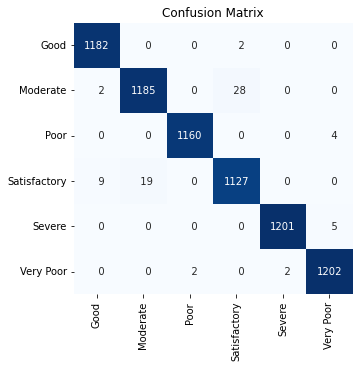

In [56]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=RF_pred),
            annot=True,
            fmt='4d',
            cbar=False,
            cmap=plt.cm.Blues,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title(label='Confusion Matrix')
plt.show()

In [58]:
with open(file='models/RandomForest_model.pkl',mode='wb') as file:
    pickle.dump(obj=RF_model,file=file)

---

# Algorithm:2 SupportVectorMachine

In [59]:
from sklearn.svm import SVC
SVC_model=SVC()
SVC_model.fit(X_train.values,y_train)

SVC()

In [60]:
SVC_pred=SVC_model.predict(X_test.values)
print(SVC_pred.tolist())

[4, 3, 4, 3, 5, 0, 3, 4, 1, 0, 2, 1, 3, 1, 2, 3, 5, 2, 0, 4, 4, 3, 1, 2, 4, 0, 5, 1, 2, 4, 2, 0, 2, 5, 3, 4, 4, 5, 4, 4, 0, 3, 4, 2, 5, 5, 2, 5, 3, 0, 5, 0, 3, 3, 4, 5, 1, 0, 0, 2, 3, 0, 5, 0, 3, 4, 3, 2, 2, 1, 0, 0, 2, 2, 2, 5, 0, 1, 2, 1, 4, 3, 4, 4, 3, 5, 0, 3, 4, 1, 0, 4, 1, 0, 3, 4, 2, 4, 1, 1, 4, 4, 5, 4, 2, 1, 4, 4, 2, 1, 4, 0, 5, 3, 5, 0, 5, 5, 1, 4, 5, 2, 3, 1, 0, 4, 0, 5, 5, 5, 0, 4, 2, 2, 1, 4, 2, 3, 1, 5, 4, 4, 1, 2, 5, 4, 1, 0, 0, 4, 3, 5, 1, 4, 3, 2, 2, 4, 3, 4, 0, 0, 0, 5, 1, 2, 0, 3, 4, 0, 0, 5, 2, 1, 0, 4, 2, 0, 4, 3, 4, 0, 2, 0, 1, 1, 5, 5, 4, 4, 2, 2, 5, 0, 2, 5, 4, 4, 5, 3, 3, 0, 1, 2, 1, 5, 4, 5, 1, 1, 1, 0, 2, 2, 3, 2, 5, 5, 2, 4, 3, 4, 1, 5, 2, 0, 2, 1, 3, 1, 0, 3, 1, 2, 1, 3, 0, 0, 4, 4, 5, 3, 3, 2, 2, 4, 0, 2, 0, 0, 4, 2, 5, 5, 3, 3, 5, 2, 4, 1, 5, 1, 4, 2, 4, 1, 4, 3, 0, 4, 4, 0, 1, 0, 1, 4, 2, 2, 5, 3, 5, 2, 5, 4, 2, 3, 5, 4, 1, 2, 2, 5, 0, 4, 5, 1, 0, 5, 3, 2, 3, 5, 3, 4, 4, 5, 5, 5, 3, 1, 5, 4, 3, 5, 1, 3, 2, 4, 4, 2, 2, 3, 1, 0, 0, 1, 5, 0, 0, 5, 0, 4, 2, 

In [61]:
print(y_test.tolist())

[4, 3, 4, 3, 5, 0, 3, 4, 1, 0, 2, 1, 3, 1, 2, 3, 5, 2, 0, 4, 4, 3, 1, 2, 4, 0, 5, 1, 2, 4, 2, 0, 2, 5, 3, 4, 4, 5, 4, 4, 0, 3, 4, 2, 5, 5, 2, 5, 3, 0, 5, 0, 3, 3, 4, 5, 1, 0, 0, 2, 3, 0, 5, 0, 3, 4, 3, 2, 2, 1, 0, 0, 2, 2, 2, 5, 0, 1, 2, 1, 4, 3, 4, 4, 3, 5, 0, 3, 4, 1, 0, 4, 1, 3, 3, 4, 2, 4, 1, 1, 4, 4, 5, 4, 1, 1, 4, 4, 2, 1, 4, 0, 5, 3, 5, 0, 5, 5, 1, 4, 5, 2, 3, 1, 0, 4, 0, 5, 5, 4, 0, 4, 1, 2, 1, 4, 2, 3, 1, 5, 4, 4, 1, 2, 5, 4, 1, 0, 0, 4, 3, 5, 1, 4, 3, 2, 2, 4, 3, 4, 0, 0, 0, 5, 1, 2, 0, 3, 4, 0, 3, 5, 2, 1, 0, 4, 2, 3, 4, 3, 4, 0, 2, 0, 1, 1, 5, 5, 4, 4, 2, 2, 5, 0, 2, 5, 4, 4, 5, 3, 3, 0, 1, 2, 1, 5, 4, 5, 1, 1, 1, 0, 2, 2, 3, 2, 5, 5, 2, 4, 3, 4, 1, 5, 2, 0, 2, 1, 3, 1, 0, 3, 1, 2, 1, 3, 0, 0, 4, 4, 5, 3, 3, 2, 2, 4, 0, 2, 0, 0, 4, 2, 5, 5, 3, 3, 5, 2, 4, 1, 5, 1, 4, 2, 4, 1, 4, 3, 0, 4, 4, 0, 1, 0, 1, 4, 2, 2, 5, 3, 5, 2, 5, 4, 2, 3, 5, 4, 1, 2, 2, 5, 0, 4, 5, 1, 0, 5, 3, 2, 3, 5, 3, 4, 4, 5, 5, 4, 3, 1, 5, 4, 3, 5, 1, 3, 2, 4, 4, 2, 2, 3, 1, 0, 0, 1, 5, 0, 3, 5, 0, 4, 2, 

### Result Analysis

***Accuracy Score***

In [62]:
SVC_accuracy=accuracy_score(y_true=y_test,y_pred=SVC_pred)
print(f'SupportVectorMachine model accuracy is {SVC_accuracy*100.0:.2f}%')

SupportVectorMachine model accuracy is 97.90%


In [63]:
print(classification_report(y_true=y_test,y_pred=SVC_pred,target_names=class_labels))

              precision    recall  f1-score   support

        Good       0.94      1.00      0.97      1184
    Moderate       0.99      0.97      0.98      1215
        Poor       0.98      0.99      0.98      1164
Satisfactory       0.99      0.92      0.96      1155
      Severe       0.99      1.00      0.99      1206
   Very Poor       0.99      0.99      0.99      1206

    accuracy                           0.98      7130
   macro avg       0.98      0.98      0.98      7130
weighted avg       0.98      0.98      0.98      7130



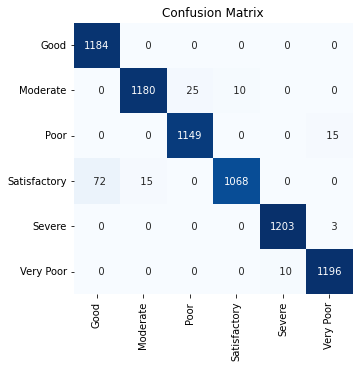

In [64]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=SVC_pred),
            annot=True,
            fmt='4d',
            cbar=False,
            cmap=plt.cm.Blues,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title(label='Confusion Matrix')
plt.show()

In [65]:
with open(file='models/SupportVectorMachine_model.pkl',mode='wb') as file:
    pickle.dump(obj=SVC_model,file=file)

---

## Thank You